In [14]:
# import lmao
from lmao._utils import *

# ALICE Infologger Preprocessing

In [2]:
from lmao.preprocessing import LMAOPrep

In [2]:
prep = LMAOPrep(data_type='alice_info')

In [3]:
prep.from_parsed_csv(csv_path='dataset/ALICE-OSLdataset/phob_test_20220312_sample_struct_no_new15.csv')

'/Users/IsRealNPK/LMAO/dataset/ALICE-OSLdataset/phob_test_20220312_sample_struct_no_new15.csv'

In [ ]:
prep.prep_data(label_path='dataset/OneDrive_1_2-5-2024/runs.csv',
               eor_path='dataset/OneDrive_1_2-5-2024/eor_reasons.csv')

In [63]:
prep.df

,session_id,severity,content,event_id,event_template,label,EOR,EOR_id,run_quality
134071,24064,I,writing 1 messages to aliecs.before_start_acti...,2,writing <*> messages to <*> (partition:<*>,not crashed,eor test.,61.0,test
134080,24064,I,overriding run start time in the GRP object to...,378,overriding run start time in the GRP object to...,not crashed,eor test.,61.0,test
134094,24064,I,writing 1 messages to aliecs.env_leave_state.C...,2,writing <*> messages to <*> (partition:<*>,not crashed,eor test.,61.0,test
134098,24064,I,starting new run,383,starting new run,not crashed,eor test.,61.0,test
135408,24064,I,Run number 526264,384,Run number <*>,not crashed,eor test.,61.0,test
...,...,...,...,...,...,...,...,...,...
34856755,24356,W,Non-contiguous timeframe IDs 187572 ... 187574,723,Non-contiguous timeframe IDs <*> ... <*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad
34856756,24356,W,Non-contiguous timeframe IDs 187572 ... 187574,723,Non-contiguous timeframe IDs <*> ... <*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad
34856757,24356,W,Non-contiguous timeframe IDs 187572 ... 187574,723,Non-contiguous timeframe IDs <*> ... <*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad
34856758,24356,W,Gap in timeframe ids detected: previous= 18757...,724,Gap in timeframe ids <*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad


In [66]:
prep.df.to_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_label.parquet.gzip', compression='gzip')

# ALICE Bertopic

In [2]:
from lmao.topicmodel import LMAOTopic
topic_model = LMAOTopic()

Topic model mode set to :BERTopic.
Start Initialized


In [3]:
df = pd.read_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_label.parquet.gzip')

In [ ]:
# topic_model.training_model(df=df)

In [ ]:
# topic_dict = topic_model.topic_dict

In [11]:
# %%timeit
# topic_model.model.transform(df.content.tolist()[:1000])
# topic, _ = topic_model.model.transform(df.content.tolist()[0])
# topic

1.25 s ± 304 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
topic_model.from_trained_model(model_path='lmao/topicmodel/model/BERTopic-ALICE_info_no_severity_D-all-MiniLM-L6-v2')

Done


In [5]:
topic_dict = topic_model.topic_dict

In [6]:
df = pd.read_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_label.parquet.gzip')

In [7]:
df = topic_model.get_topic(df=df)

,session_id,severity,content,event_id,event_template,label,EOR,EOR_id,run_quality,topic
134071,24064,I,writing 1 messages to aliecs.before_start_acti...,2,writing <*> messages to <*> (partition:<*>,not crashed,eor test.,61.0,test,572
134080,24064,I,overriding run start time in the GRP object to...,378,overriding run start time in the GRP object to...,not crashed,eor test.,61.0,test,1682
134094,24064,I,writing 1 messages to aliecs.env_leave_state.C...,2,writing <*> messages to <*> (partition:<*>,not crashed,eor test.,61.0,test,464
134098,24064,I,starting new run,383,starting new run,not crashed,eor test.,61.0,test,-1
135408,24064,I,Run number 526264,384,Run number <*>,not crashed,eor test.,61.0,test,1635
...,...,...,...,...,...,...,...,...,...,...
34856755,24356,W,Non-contiguous timeframe IDs 187572 ... 187574,723,Non-contiguous timeframe IDs <*> ... <*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,1882
34856756,24356,W,Non-contiguous timeframe IDs 187572 ... 187574,723,Non-contiguous timeframe IDs <*> ... <*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,1882
34856757,24356,W,Non-contiguous timeframe IDs 187572 ... 187574,723,Non-contiguous timeframe IDs <*> ... <*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,1882
34856758,24356,W,Gap in timeframe ids detected: previous= 18757...,724,Gap in timeframe ids <*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,-1


In [8]:
topics_per_class = topic_model.model.topics_per_class(df.content.tolist(), df.label.tolist())
topic_model.model.visualize_topics_per_class(topics_per_class)

In [9]:
topics_per_class = topic_model.model.topics_per_class(df.content.tolist(), df.EOR.tolist())
topic_model.model.visualize_topics_per_class(topics_per_class)

In [54]:
df[df['topic']==177]

,session_id,severity,content,event_id,event_template,label,EOR,EOR_id,run_quality,topic
179910,24064,I,Stopping DMA for ROC H1-D4-F0,505,Stopping DMA for ROC <*>,not crashed,eor test.,61.0,test,177
179911,24064,I,Stopping DMA for ROC H1-D4-F1,505,Stopping DMA for ROC <*>,not crashed,eor test.,61.0,test,177
179912,24064,I,Stopping DMA for ROC H0-D0-F0,505,Stopping DMA for ROC <*>,not crashed,eor test.,61.0,test,177
179913,24064,I,Stopping DMA for ROC H0-D0-F1,505,Stopping DMA for ROC <*>,not crashed,eor test.,61.0,test,177
187195,24064,I,Stopping DMA for ROC H1-D4-F0,505,Stopping DMA for ROC <*>,not crashed,eor test.,61.0,test,177
...,...,...,...,...,...,...,...,...,...,...
34847621,24356,I,ITSDecoder registered new link link cruID:0x00...,440,ITSDecoder registered new link link cruID:<*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,177
34848487,24356,I,ITSDecoder registered new link link cruID:0x00...,440,ITSDecoder registered new link link cruID:<*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,177
34849602,24356,I,ITSDecoder Attaching link cruID:0x00c1/lID8 fe...,441,ITSDecoder Attaching link cruID:<*>feeID:<*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,177
34849603,24356,I,ITSDecoder Attaching link cruID:0x00c1/lID9 fe...,441,ITSDecoder Attaching link cruID:<*>feeID:<*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,177


In [8]:
df.to_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_topic.parquet.gzip')

# LMAO graph

In [13]:
from lmao.graph import LMAOGraph

In [3]:
data = LMAOGraph(df=pd.read_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_topic.parquet.gzip'),mode='pyg', padding=False)

Topics size of this dataframe is : 2149
Getting Group by from dataframe


  0%|          | 0/126 [00:00<?, ?it/s]

Max sequence size of this dataframe is : 772369
Please call .get_PyG() to get PyG dataloader.


In [4]:
data.df['X'].apply(len).sort_values(ascending=False).index[110]

41

In [6]:
G = data.get_one_graph(i=41, feature=False)
len(G.nodes())

84

In [7]:
data.df['y'][41]

'crashed'

In [8]:
from lmao.visualizer.plot import plotly_digraph

In [ ]:
plotly_digraph(G, label=data.df['y'][41], topic_dict=topic_dict)

In [15]:
data = LMAOGraph(df=pd.read_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_topic.parquet.gzip'),mode='freq')

Topics size of this dataframe is : 2149
Getting Group by from dataframe


  0%|          | 0/126 [00:00<?, ?it/s]

Apply Count to calculate each topic frequency


  0%|          | 0/126 [00:00<?, ?it/s]

Expanding X into 2149 features


  0%|          | 0/126 [00:00<?, ?it/s]

In [18]:
data.df.to_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_freq_with_label.parquet.gzip')

# Classification

In [16]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data.df,test_size=0.2, stratify=data.df.y)

In [8]:
# lgb.plot_importance(lgb_clf, importance_type="gain", figsize=(7,12), title="LightGBM Feature Importance (Gain)")
# plt.show()

In [17]:
from lmao.classifier import LMAOClassifier

In [18]:
clf = LMAOClassifier(model_type='lgbm')
clf.fit(train_df.drop(columns='y'), train_df.y)

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15693
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1283
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [19]:
pred = clf.predict(test_df.drop(columns='y'))

In [20]:
clf.model.predict_proba(test_df.drop(columns='y'))

array([[0.60218001, 0.39781999],
       [0.91911983, 0.08088017],
       [0.24683194, 0.75316806],
       [0.7508184 , 0.2491816 ],
       [0.42361312, 0.57638688],
       [0.10350786, 0.89649214],
       [0.00134332, 0.99865668],
       [0.0027689 , 0.9972311 ],
       [0.841045  , 0.158955  ],
       [0.00333594, 0.99666406],
       [0.03679289, 0.96320711],
       [0.65097872, 0.34902128],
       [0.04728179, 0.95271821],
       [0.39100234, 0.60899766],
       [0.99179337, 0.00820663],
       [0.99298551, 0.00701449],
       [0.45137995, 0.54862005],
       [0.98632499, 0.01367501],
       [0.02788985, 0.97211015],
       [0.74872712, 0.25127288],
       [0.83723763, 0.16276237],
       [0.94692529, 0.05307471],
       [0.69759843, 0.30240157],
       [0.99836555, 0.00163445],
       [0.4041964 , 0.5958036 ],
       [0.99483998, 0.00516002]])

In [10]:
print(clf.eval_report(test_df.drop(columns='y'), test_df.y))

              precision    recall  f1-score   support

     crashed      0.833     0.833     0.833        12
 not crashed      0.857     0.857     0.857        14

    accuracy                          0.846        26
   macro avg      0.845     0.845     0.845        26
weighted avg      0.846     0.846     0.846        26



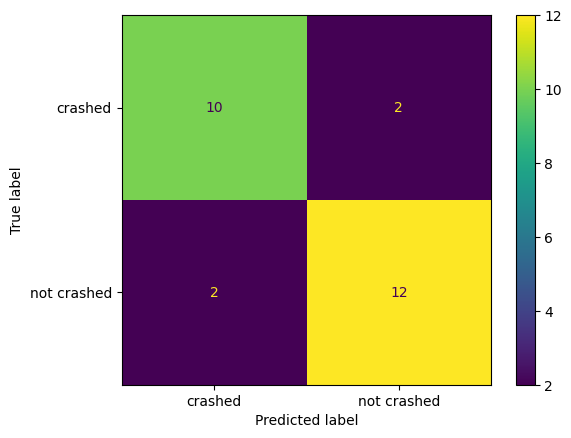

In [11]:
clf.confusion_matrix_plot(test_df.drop(columns='y'), test_df.y)

In [12]:
clf.confusion_report(test_df.drop(columns='y'), test_df.y)

array([[10,  2],
       [ 2, 12]])